In [1]:
library(ggplot2)
library(ggmap)
library(maps)
library(mapdata)
library(dplyr)

#read in crash data

crash_2016 <- read.csv("Datasets/CRASH_2016_Statewide.csv",
                       encoding='latin-1')
crash_2015 <- read.csv("Datasets/CRASH_2015_Statewide.csv",
                       encoding='latin-1')
crash_2014 <- read.csv("Datasets/CRASH_2014_Statewide.csv",
                       encoding='latin-1')
crash_2013 <- read.csv("Datasets/CRASH_2013_Statewide.csv",
                       encoding='latin-1')
crash_2012 <- read.csv("Datasets/CRASH_2012_Statewide.csv",
                       encoding='latin-1')
crash_2011 <- read.csv("Datasets/CRASH_2011_Statewide.csv",
                       encoding='latin-1')
crash_2010 <- read.csv("Datasets/CRASH_2010_Statewide.csv",
                       encoding='latin-1')
crash_2009 <- read.csv("Datasets/CRASH_2009_Statewide.csv",
                       encoding='latin-1')
crash_2008 <- read.csv("Datasets/CRASH_2008_Statewide.csv",
                       encoding='latin-1')
crash_2007 <- read.csv("Datasets/CRASH_2007_Statewide.csv",
                       encoding='latin-1')
crash_2006 <- read.csv("Datasets/CRASH_2006_Statewide.csv",
                       encoding='latin-1')
crash_2005 <- read.csv("Datasets/CRASH_2005_Statewide.csv",
                       encoding='latin-1')
crash_2004 <- read.csv("Datasets/CRASH_2004_Statewide.csv",
                       encoding='latin-1')
crash_2003 <- read.csv("Datasets/CRASH_2003_Statewide.csv",
                       encoding='latin-1')
crash_2002 <- read.csv("Datasets/CRASH_2002_Statewide.csv",
                       encoding='latin-1')
crash_2001 <- read.csv("Datasets/CRASH_2001_Statewide.csv",
                       encoding='latin-1')
crash_2000 <- read.csv("Datasets/CRASH_2000_Statewide.csv",
                       encoding='latin-1')
crash_1999 <- read.csv("Datasets/CRASH_1999_Statewide.csv",
                       encoding='latin-1')
crash_1998 <- read.csv("Datasets/CRASH_1998_Statewide.csv",
                       encoding='latin-1')
crash_1997 <- read.csv("Datasets/CRASH_1997_Statewide.csv",
                       encoding='latin-1')


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
#read in extra crash variable sets

FLAG_2016 <- read.csv("Datasets/FLAG_2016_Statewide.csv",
                       encoding='latin-1')
FLAG_2015 <- read.csv("Datasets/FLAG_2015_Statewide.csv",
                       encoding='latin-1')
FLAG_2014 <- read.csv("Datasets/FLAG_2014_Statewide.csv",
                       encoding='latin-1')
FLAG_2013 <- read.csv("Datasets/FLAG_2013_Statewide.csv",
                       encoding='latin-1')
FLAG_2012 <- read.csv("Datasets/FLAG_2012_Statewide.csv",
                       encoding='latin-1')
FLAG_2011 <- read.csv("Datasets/FLAG_2011_Statewide.csv",
                       encoding='latin-1')
FLAG_2010 <- read.csv("Datasets/FLAG_2010_Statewide.csv",
                       encoding='latin-1')
FLAG_2009 <- read.csv("Datasets/FLAG_2009_Statewide.csv",
                       encoding='latin-1')
FLAG_2008 <- read.csv("Datasets/FLAG_2008_Statewide.csv",
                       encoding='latin-1')
FLAG_2007 <- read.csv("Datasets/FLAG_2007_Statewide.csv",
                       encoding='latin-1')
FLAG_2006 <- read.csv("Datasets/FLAG_2006_Statewide.csv",
                       encoding='latin-1')
FLAG_2005 <- read.csv("Datasets/FLAG_2005_Statewide.csv",
                       encoding='latin-1')
FLAG_2004 <- read.csv("Datasets/FLAG_2004_Statewide.csv",
                       encoding='latin-1')
FLAG_2003 <- read.csv("Datasets/FLAG_2003_Statewide.csv",
                       encoding='latin-1')
FLAG_2002 <- read.csv("Datasets/FLAG_2002_Statewide.csv",
                       encoding='latin-1')
FLAG_2001 <- read.csv("Datasets/FLAG_2001_Statewide.csv",
                       encoding='latin-1')
FLAG_2000 <- read.csv("Datasets/FLAG_2000_Statewide.csv",
                       encoding='latin-1')
FLAG_1999 <- read.csv("Datasets/FLAG_1999_Statewide.csv",
                       encoding='latin-1')
FLAG_1998 <- read.csv("Datasets/FLAG_1998_Statewide.csv",
                       encoding='latin-1')
FLAG_1997 <- read.csv("Datasets/FLAG_1997_Statewide.csv",
                       encoding='latin-1')

In [3]:
#keep only a few columns from crash data

crash_1997 <- crash_1997[c("CRN","MCYCLE_DEATH_COUNT","MOTORCYCLE_COUNT","FATAL_COUNT","DEC_LAT","DEC_LONG")]
crash_1998 <- crash_1998[c("CRN","MCYCLE_DEATH_COUNT","MOTORCYCLE_COUNT","FATAL_COUNT","DEC_LAT","DEC_LONG")]
crash_1999 <- crash_1999[c("CRN","MCYCLE_DEATH_COUNT","MOTORCYCLE_COUNT","FATAL_COUNT","DEC_LAT","DEC_LONG")]
crash_2000 <- crash_2000[c("CRN","MCYCLE_DEATH_COUNT","MOTORCYCLE_COUNT","FATAL_COUNT","DEC_LAT","DEC_LONG")]
crash_2001 <- crash_2001[c("CRN","MCYCLE_DEATH_COUNT","MOTORCYCLE_COUNT","FATAL_COUNT","DEC_LAT","DEC_LONG")]
crash_2002 <- crash_2002[c("CRN","MCYCLE_DEATH_COUNT","MOTORCYCLE_COUNT","FATAL_COUNT","DEC_LAT","DEC_LONG")]
crash_2003 <- crash_2003[c("CRN","MCYCLE_DEATH_COUNT","MOTORCYCLE_COUNT","FATAL_COUNT","DEC_LAT","DEC_LONG")]
crash_2004 <- crash_2004[c("CRN","MCYCLE_DEATH_COUNT","MOTORCYCLE_COUNT","FATAL_COUNT","DEC_LAT","DEC_LONG")]
crash_2005 <- crash_2005[c("CRN","MCYCLE_DEATH_COUNT","MOTORCYCLE_COUNT","FATAL_COUNT","DEC_LAT","DEC_LONG")]
crash_2006 <- crash_2006[c("CRN","MCYCLE_DEATH_COUNT","MOTORCYCLE_COUNT","FATAL_COUNT","DEC_LAT","DEC_LONG")]
crash_2007 <- crash_2007[c("CRN","MCYCLE_DEATH_COUNT","MOTORCYCLE_COUNT","FATAL_COUNT","DEC_LAT","DEC_LONG")]
crash_2008 <- crash_2008[c("CRN","MCYCLE_DEATH_COUNT","MOTORCYCLE_COUNT","FATAL_COUNT","DEC_LAT","DEC_LONG")]
crash_2009 <- crash_2009[c("CRN","MCYCLE_DEATH_COUNT","MOTORCYCLE_COUNT","FATAL_COUNT","DEC_LAT","DEC_LONG")]
crash_2010 <- crash_2010[c("CRN","MCYCLE_DEATH_COUNT","MOTORCYCLE_COUNT","FATAL_COUNT","DEC_LAT","DEC_LONG")]
crash_2011 <- crash_2011[c("CRN","MCYCLE_DEATH_COUNT","MOTORCYCLE_COUNT","FATAL_COUNT","DEC_LAT","DEC_LONG")]
crash_2012 <- crash_2012[c("CRN","MCYCLE_DEATH_COUNT","MOTORCYCLE_COUNT","FATAL_COUNT","DEC_LAT","DEC_LONG")]
crash_2013 <- crash_2013[c("CRN","MCYCLE_DEATH_COUNT","MOTORCYCLE_COUNT","FATAL_COUNT","DEC_LAT","DEC_LONG")]
crash_2014 <- crash_2014[c("CRN","MCYCLE_DEATH_COUNT","MOTORCYCLE_COUNT","FATAL_COUNT","DEC_LAT","DEC_LONG")]
crash_2015 <- crash_2015[c("CRN","MCYCLE_DEATH_COUNT","MOTORCYCLE_COUNT","FATAL_COUNT","DEC_LAT","DEC_LONG")]
crash_2016 <- crash_2016[c("CRN","MCYCLE_DEATH_COUNT","MOTORCYCLE_COUNT","FATAL_COUNT","DEC_LAT","DEC_LONG")]


In [4]:
#combine crash year data
total_crash = rbind(crash_2016,crash_2015,crash_2014,crash_2013,crash_2012,crash_2011,crash_2010,crash_2009,
                    crash_2008,crash_2007,crash_2006,crash_2005,crash_2004,crash_2003,crash_2002,crash_2001,
                    crash_1999,crash_1998,crash_1997)
head(total_crash)

CRN,MCYCLE_DEATH_COUNT,MOTORCYCLE_COUNT,FATAL_COUNT,DEC_LAT,DEC_LONG
2016000742,0,0,0,40.0726,-75.3467
2016004102,0,0,0,40.2970,-75.5208
2016004143,0,0,0,40.4069,-75.2592
2016004176,0,0,0,40.2433,-75.6200
2016005228,0,0,0,40.9983,-75.1506
2016008524,0,0,0,41.5010,-75.6246


In [5]:
#combine multiple years of FLAG data
total_FLAG = rbind(FLAG_2016,FLAG_2015,FLAG_2014,FLAG_2013,FLAG_2012,FLAG_2011,FLAG_2010,FLAG_2009,
                    FLAG_2008,FLAG_2007,FLAG_2006,FLAG_2005,FLAG_2004,FLAG_2003,FLAG_2002,FLAG_2001,
                    FLAG_2000,FLAG_1999,FLAG_1998,FLAG_1997)
head(total_FLAG)

CRN,INTERSTATE,STATE_ROAD,LOCAL_ROAD,LOCAL_ROAD_ONLY,TURNPIKE,WET_ROAD,SNOW_SLUSH_ROAD,ICY_ROAD,SUDDEN_DEER,⋯,MC_DRINKING_DRIVER,DRUG_RELATED,ILLEGAL_DRUG_RELATED,SCHOOL_BUS_UNIT,DRUGGED_DRIVER,IMPAIRED_DRIVER,CRASH_YEAR,COUNTY,COUNTY_YEAR,MUNICIPALITY
2017006535,0,1,0,0,0,0,0,0,0,,0,0,0,0,0,1,2016,25,FLAG_2016_Erie,25407
2017006583,0,1,0,0,0,0,0,0,0,,0,0,0,0,0,0,2016,56,FLAG_2016_Sullivan,56202
2016130286,0,0,1,1,0,0,0,0,0,,0,0,0,0,0,0,2016,46,FLAG_2016_Montgomery,46106
2016130290,0,1,0,0,0,1,0,0,0,,0,0,0,0,0,0,2016,6,FLAG_2016_Berks,6206
2016130573,0,1,1,0,0,0,0,0,0,,0,0,0,0,0,0,2016,7,FLAG_2016_Blair,7403
2017005197,0,0,1,1,0,0,0,0,0,,0,0,0,0,0,0,2016,67,FLAG_2016_Philadelphia,67301


In [6]:
#add FLAG data by crash number
total_crash <- merge(total_crash,total_FLAG,by="CRN")
#head(total_crash)
#write.csv(total_crash, file = "statecycle_flag.csv")
str(total_crash)

'data.frame':	2502257 obs. of  100 variables:
 $ CRN                 : int  1997000001 1997000002 1997000003 1997000004 1997000005 1997000006 1997000007 1997000008 1997000009 1997000010 ...
 $ MCYCLE_DEATH_COUNT  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ MOTORCYCLE_COUNT    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ FATAL_COUNT         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DEC_LAT             : num  40.4 40.4 40.4 NA 40.3 ...
 $ DEC_LONG            : num  -75.2 -75.2 -75.2 NA -80.1 ...
 $ INTERSTATE          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ STATE_ROAD          : int  1 1 1 0 1 1 0 1 1 1 ...
 $ LOCAL_ROAD          : int  0 0 0 1 0 0 1 1 0 1 ...
 $ LOCAL_ROAD_ONLY     : int  0 0 0 1 0 0 1 0 0 0 ...
 $ TURNPIKE            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ WET_ROAD            : int  0 0 0 0 0 0 0 0 0 1 ...
 $ SNOW_SLUSH_ROAD     : int  1 1 0 0 0 0 0 0 0 0 ...
 $ ICY_ROAD            : int  0 0 0 1 0 1 1 0 0 0 ...
 $ SUDDEN_DEER         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ SHLDR_RELATED       : int  0 0 0 0 0 0 0 

In [9]:
sum(total_crash$MCYCLE_DEATH_COUNT)

[1] 3345

In [35]:
# total_crash %>% 
# group_by(CRASH_YEAR) %>% 
# tally()

total_crash %>% 
group_by(CRASH_YEAR, DISTRACTED) %>% 
tally()%>%
summarize(distracted_crashes = sum(DISTRACTED))


CRASH_YEAR,distracted_crashes
0,0
1,0
1997,1
1998,1
1999,1
2001,1
2002,1
2003,1
2004,1
2005,1


In [36]:
total_crash %>% 
filter(FATAL == 1) %>%
group_by(CRASH_YEAR) %>%
summarize(fatal_crashes = sum(FATAL), distracted_crashes = sum(DISTRACTED))

# distracted<-
# total_crash %>%
# group_by(CRASH_YEAR, MCYCLE_DEATH_COUNT) %>%
# filter(DISTRACTED == 1)%>%
# summarize(total = sum(DISTRACTED))%>%
# arrange(CRASH_YEAR)
# distracted



CRASH_YEAR,fatal_crashes,distracted_crashes
1997,1418,35
1998,1358,28
1999,1382,22
2001,1378,25
2002,1317,56
2003,1418,45
2004,1362,62
2005,1497,74
2006,1409,73
2007,1393,66


In [37]:
#mcycle_total<-total_crash$MOTORCYCLE_COUNT >= 1 
#head(mcycle_total)

mcycle_distract<-total_crash %>% 
filter(total_crash$MOTORCYCLE_COUNT >= 1)%>%
filter(FATAL == 1) %>%
group_by(CRASH_YEAR) %>%
summarize(motorcycle_crashes = sum(MOTORCYCLE_COUNT), distracted_crashes = sum(DISTRACTED))
mcycle_distract

CRASH_YEAR,motorcycle_crashes,distracted_crashes
1997,96,1
1998,115,0
1999,113,3
2001,138,1
2002,117,2
2003,159,5
2004,161,7
2005,212,8
2006,188,4
2007,233,5


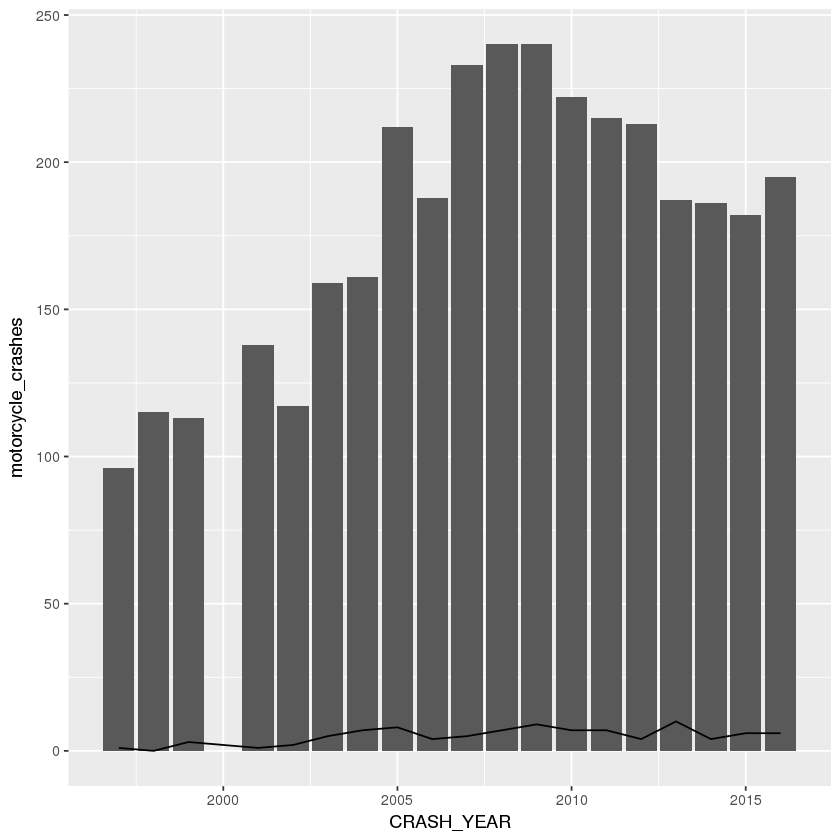

In [27]:
# total_crash %>%
#   ggplot(aes(x = as.factor(CRASH_YEAR), y = MOTORCYCLE_COUNT)) +
#     stat_summary(fun.y=sum,geom="bar", fill = "dark red") +
#     labs(title = "Pennsylvania crashes involving motorcycles") +
#     labs(subtitle = '1997-2016') +
#     labs(x = "Year", y = "Injury Accidents") +
#     scale_y_continuous(labels = scales::comma_format()) +
#     theme_minimal()+
#     theme(axis.text.x = element_text(angle =45, hjust = 1))

ggplot(mcycle_distract, aes(x=CRASH_YEAR, y= motorcycle_crashes)) + 
  geom_bar(stat = "identity") +
  geom_line(data=mcycle_distract, aes(x=CRASH_YEAR, y=distracted_crashes))

In [28]:
#totalmcycle fatals
state_fatals1 <- 
total_crash %>% 
group_by(CRASH_YEAR) %>%
summarize(total = sum(MCYCLE_DEATH_COUNT))%>%
arrange(CRASH_YEAR)
state_fatals1

CRASH_YEAR,total
0,0
1,0
1997,92
1998,111
1999,111
2001,132
2002,116
2003,156
2004,158
2005,205
